In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

#from demos.Opendrift_Parcels.CompareModels import *
from demos.Opendrift_Parcels.GPUOcean_runDeterministic import *

In [2]:
%cuda_context_handler gpu_ctx

In [3]:
source_url = '/home/johanna/gpu-ocean/gpu_ocean/demos/MPI_SIR/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'

lon, lat = 14.2, 68.5
#lon, lat = 9.2, 63.9
#lon, lat = 4.9, 60.0
hours = 12

X, Y, proj = getXYproj(source_url)

initx, inity, x0,x1, y0,y1 = initlonlat2initgpuocean(source_url, lon, lat, X = X, Y = Y, proj=proj)

sim_args = {
    "gpu_ctx": gpu_ctx,
    "dt": 0.0,
    "rk_order": 2,
    "desingularization_eps": 1.0
     }

domain = [x0,x1,y0,y1]


1318389.926555644 510152.22950223205


In [4]:
print(initx, inity, x0, y0)

39189.92655564402 38952.22950223205 1597 587


In [12]:
a, b = lonlat2xygpuocean(source_url, 14.2, 68.5,x0, y0, X = X, Y = Y, proj = proj)
print(a,b)

1318389.926555644 510152.22950223205
39189.92655564402 38952.22950223205


In [6]:
gpuobs = simulate_gpuocean_deterministic(source_url, domain, initx, inity, sim_args = sim_args, wind_drift_factor = 0.0, forecast_duration = hours)

This will give inaccurate angle along the border!
This will give inaccurate coriolis along the border!


'0% [##############################] 100%. Total: 15s, elapsed: 15s, remaining: 0s'

In [7]:
#o1 = simulate_opendrift(source_url, lat, lon, 0.0, True, hours) #no wind, average velocity
#o1obs = opendriftObj2gpuoceanObs(o1, x0, x1,y0,y1)

In [8]:
#simulate_parcels(source_url, 'ex_parcels.nc', lat,lon,0.0,True,hours) #no wind, average velocity
#pobs = parcelsFile2gpuoceanObs('ex_parcels.nc', source_url, x0, x1, y0,y1)

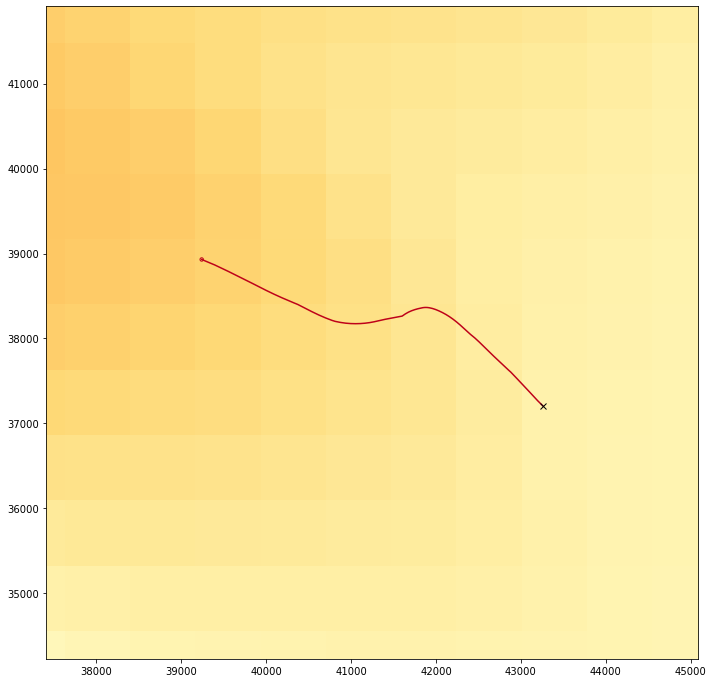

In [9]:
%matplotlib inline
ax = createForecastCanvas(gpuobs,background = True, url= source_url, domain = domain, zoom = 10)
plotAllDrifters(gpuobs, ax= ax, end = hours, color_id = 0)
#plotAllDrifters(o1obs, ax = ax, end = hours, color_id = 1)
#plotAllDrifters(pobs, ax = ax, end = hours, color_id = 2)